**Dirichlet Process Example
Adapted from Tamara Broderick's Bayesian Nonparametrics Tutorial
from the 2016 Machine Learning Summer School**

http://www.tamarabroderick.com/tutorial_2016_mlss_cadiz.html

https://github.com/tbroderick/bnp_tutorial/blob/2016mlss/ex6_dpmm.R

In [1]:
%matplotlib inline
import numpy as np
import sys
import matplotlib.pyplot as plt

**Dirichlet Process Gaussian Mixture Model Model for 2D data**

1) Pick a concentration parameter $\alpha \geq 1$

2) Draw an infinite categorical parameter of component probabilities:

$$
\begin{align*}
[\rho_1,\rho_2,\rho_3,...] &\sim GEM(\alpha)
\end{align*}
$$

3) For an infinite amount of components, draw the mean vectors $\mu$ from the prior:

$$
\begin{align*}
\mu_1 &\sim \mathcal{N}(\mu_0,\Sigma_0)\\
\mu_2 &\sim \mathcal{N}(\mu_0,\Sigma_0)\\
\mu_3 &\sim \mathcal{N}(\mu_0,\Sigma_0)\\
&\ldots
\end{align*}
$$

4) For each datapoint index $n$, pick a cluster $z_n$ and then draw the point $x_n$ from that cluster's mean:

$$
\begin{align*}
    z_n &\sim Cat(\rho_1,\rho_2,\rho_3,...)\\
    x_n &\sim \mathcal{N}(\mu_{z_n},\Sigma)
\end{align*}
$$

NOTE: We will use tricks below to skip the whole "drawing infinite amounts of things"

In [2]:
# Normal prior on the mean vectors
mu_0 = [0,0]
sig_0 = [1.5,1.5]
    
# Likelihood
sig = [0.1,0.1]

In [3]:
def Dirichlet_Process(alpha=2,draws=100):
    
    rho = [] # rho[i] is the probability of cluster i
    rhosum = 0 # sum of all rho's, at the current moment
    rhosum_list = [0] # list of the sums as we add new clusters
    x = [] # datapoints
    z = [] # cluster assignments
    mu = [] # mean vectors in 2D
    N = 0 # number of datapoints
    
    # NOTE: Technically, stopping after a certain amount of datapoints means that rhosum does not reach 1!

    for iter in range(draws):
        u = np.random.uniform()
        while(rhosum < u):
            
            # Break off another part of the stick for a new cluster
            V = np.random.beta(1,alpha)
            newrho = (1-rhosum)*V
            
            rho.append(newrho)
            rhosum = rhosum + newrho
            rhosum_list.append(rhosum)
            newmu = np.random.normal(mu_0,np.sqrt(sig_0))
            mu.append(newmu)
        thisz = max(np.where(np.array(rhosum_list) < u)[0])
        z.append(thisz)
        thismu = mu[thisz]
        newx = np.random.normal(thismu,np.sqrt(sig))
        x.append(newx)
        N +=1
        
    x = np.array(x)
    z = np.array(z)
    mu = np.array(mu)
    return x,z,mu,N

In [4]:
'''
For various values of the concentration parameter alpha,
see how many clusters are chosen for 100 draws
'''
# 20 evenly spaced alphas between 1 and 10
alphas = np.linspace(1,10,20)

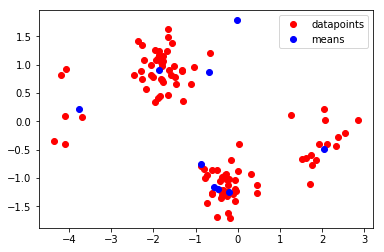

alpha: 1.0
Number of clusters for 100 datapoints: 9


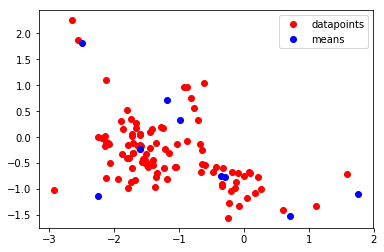

alpha: 1.47368421053
Number of clusters for 100 datapoints: 9


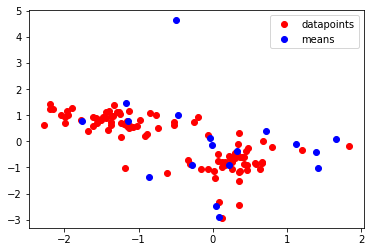

alpha: 1.94736842105
Number of clusters for 100 datapoints: 18


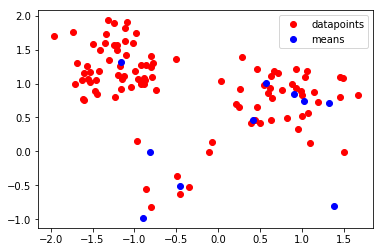

alpha: 2.42105263158
Number of clusters for 100 datapoints: 10


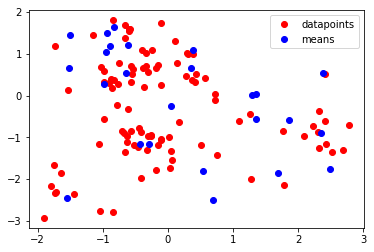

alpha: 2.89473684211
Number of clusters for 100 datapoints: 25


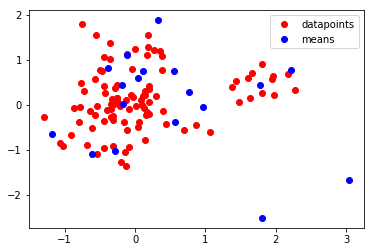

alpha: 3.36842105263
Number of clusters for 100 datapoints: 18


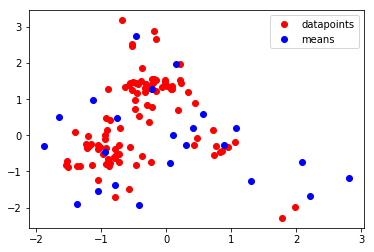

alpha: 3.84210526316
Number of clusters for 100 datapoints: 23


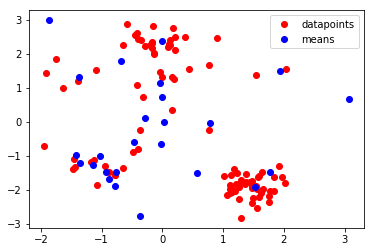

alpha: 4.31578947368
Number of clusters for 100 datapoints: 25


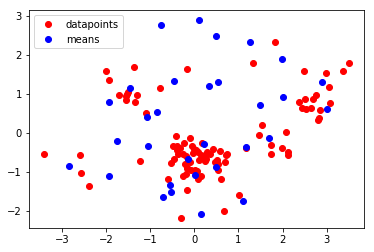

alpha: 4.78947368421
Number of clusters for 100 datapoints: 31


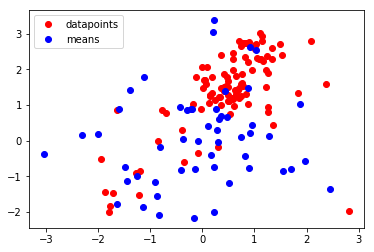

alpha: 5.26315789474
Number of clusters for 100 datapoints: 52


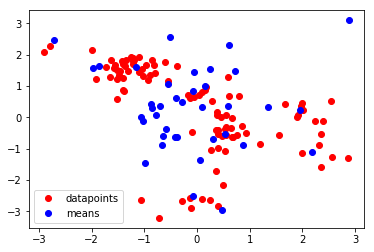

alpha: 5.73684210526
Number of clusters for 100 datapoints: 38


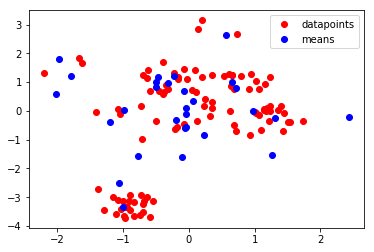

alpha: 6.21052631579
Number of clusters for 100 datapoints: 29


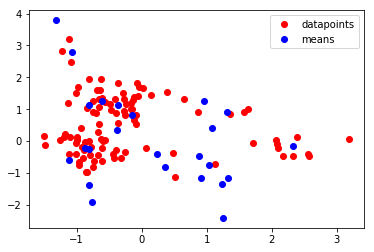

alpha: 6.68421052632
Number of clusters for 100 datapoints: 24


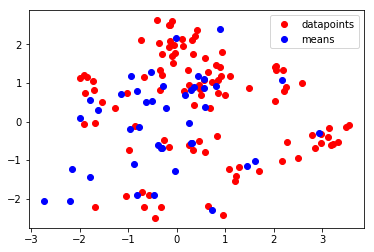

alpha: 7.15789473684
Number of clusters for 100 datapoints: 42


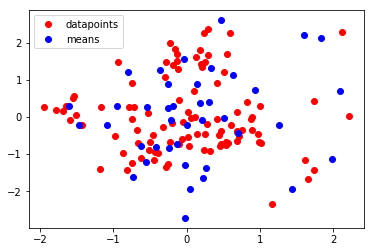

alpha: 7.63157894737
Number of clusters for 100 datapoints: 40


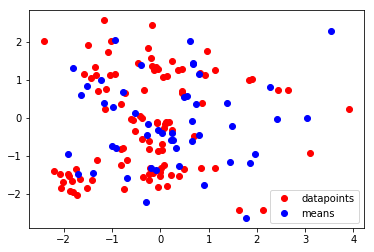

alpha: 8.10526315789
Number of clusters for 100 datapoints: 49


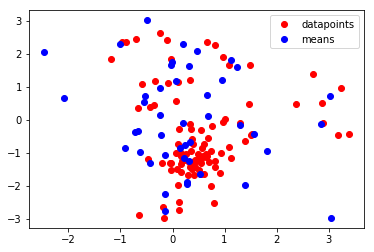

alpha: 8.57894736842
Number of clusters for 100 datapoints: 44


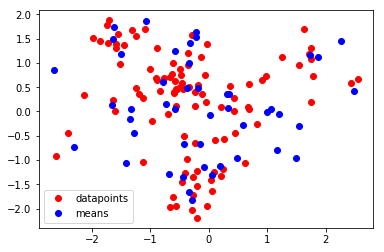

alpha: 9.05263157895
Number of clusters for 100 datapoints: 46


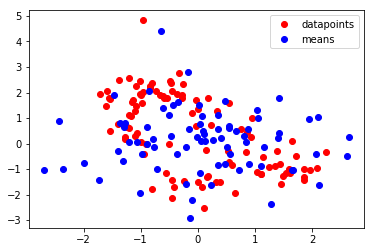

alpha: 9.52631578947
Number of clusters for 100 datapoints: 77


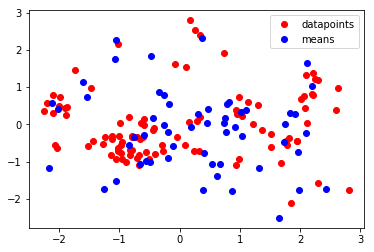

alpha: 10.0
Number of clusters for 100 datapoints: 56


In [5]:
for a in alphas:
    x,z,mu,N = Dirichlet_Process(alpha=a)
    fig = plt.figure()
    p1, = plt.plot(x[:,0],x[:,1],"ro") # plot data
    p2, = plt.plot(mu[:,0],mu[:,1],'bo') # plot means
    plt.legend([p1,p2],["datapoints","means"])
    plt.show()
    print "alpha:",a
    print "Number of clusters for 100 datapoints:",len(mu)